In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

<h1>Clasificación</h1>
<p>Clasificación es otro tipo de problema dentro de Machine Learning. La diferencia es que la variable de salida de tu dataset es discreta y denota un conjunto de clases. El algoritmo de aprendizaje debe producir una función:</p>
<h3>Clasificación</h3>
$$ f: \mathbb{R}^{(n)} => {1, ..., k} $$
<p>En comparación a regresión:</p>
<h3>Regresión</h3>
$$ f: \mathbb{R}^{(n)} => \mathbb{R} $$
<br>
<p>Ahora veamos las diferencias con respecto al algoritmo de aprendizaje.</p>
<br>
<h3>Hipótesis</h3>
<p>La primera diferencia es la hipótesis. Esta denota una función de activación que produce no linearidad en la salida de la multiplicación entre los pesos y los parámetros del problema. Además, nos permite convertir un número en una probabilidad.</p>

$$ f(x;\theta) = g(x\theta) $$

<p>Dónde g(x) es una función de activación. Veamos ejemplos de funciones de activación.</p>

<h3>Sigmoid</h3>
$$ g(x) = \frac{1}{1 + e^{-x}} $$

In [2]:
def sigmoid(x = None, deriv = None):
    sig = 1 / (1 + np.exp(-x)**2)
    if (deriv):
        return sig * (1 - sig)  
    else:
        return sig

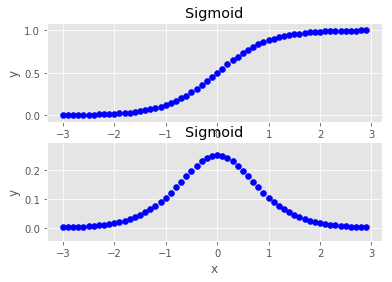

In [3]:
# Define data
x_sigmoid = np.arange(-3,3,0.1)
y_sigmoid = [sigmoid(i) for i in x_sigmoid]
y_sigmoid_deriv = [sigmoid(i, deriv = True) for i in x_sigmoid]
# Plots
plt.subplot(2, 1, 1)
plt.scatter(x_sigmoid, y_sigmoid, c = "b")
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 1, 2)
plt.scatter(x_sigmoid, y_sigmoid_deriv, c = "b")
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h3>Hyperbolic tangent</h3>
$$ th(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

In [4]:
def tanh(x = None, deriv = None):
    tan = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    if (deriv):
        return (1 - (tan)**2)
    else:
        return tan

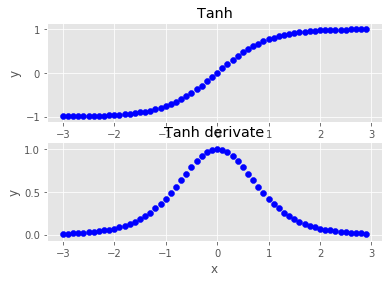

In [5]:
# Define data
x_tanh = np.arange(-3,3,0.1)
y_tanh = [tanh(i, deriv = False) for i in x_tanh]
y_tanh_deriv = [tanh(i, deriv = True) for i in x_tanh]
# Plots
plt.subplot(2, 1, 1)
plt.scatter(x_tanh, y_tanh, c = "b")
plt.title("Tanh")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(2, 1, 2)
plt.scatter(x_tanh, y_tanh_deriv, c = "b")
plt.title("Tanh derivate")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<p>La hipótesis entonces se transforma en:</p>
$$ f(x;\theta) = g(X\theta) $$

<h2>Función costo</h2>
<p>La función costo también debe ser adecuada para que el modelo matemático pueda aprender.</p>
$$ J(\theta) = \frac{-1}{m} * \sum_{i}^{m} y^{(i)}\log{(f(x;\theta))} + (1 - y^{(i)})\log{(1 - f(x;\theta))} $$

In [6]:
def cost_function(h_theta_x = None, x = None, y = None, deriv = None):
    # Local variables.
    m = x.shape[0]
    # Return cost function.
    j_theta = (-1/m) * np.sum(y*np.log(h_theta_x) + (1 - y)*np.log(1 - h_theta_x))
    if (deriv):
        return (1/m) * np.dot(x.T, (h_theta_x - y))
    else:
        return j_theta

<h2>Batch gradient descent</h2>
Repeat {
$$ \theta = \theta - \alpha \frac{\partial{J(\theta)}}{\partial{\theta}} $$
}

In [7]:
def bgd(x = None, y = None, theta = None, learning_rate = None, epochs = None):
    cost_hist = []
    for i in range(epochs):
        # Produce hypothesis.
        h_theta_x = sigmoid(np.dot(x, theta))
        # Update theta.
        theta = theta - learning_rate * cost_function(h_theta_x = h_theta_x, x = x, y = y, deriv = True)
        # Save cost function's progress.
        cost_hist.append(cost_function(h_theta_x = h_theta_x, x = x, y = y, deriv = False))
    return theta, cost_hist

<h2>Data</h2>

In [8]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0,1,1,1]]).T

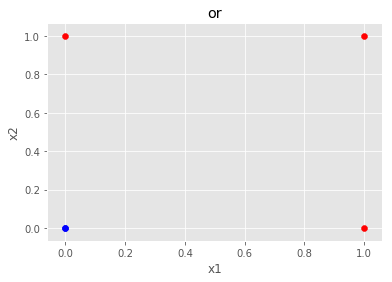

In [9]:
plt.scatter(x[1:,0], x[1:,1], c = "r")
plt.scatter(x[0,:], x[0,:], c = "b")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("or")
plt.show()

Let's create the model that will learn how to fit this distribution.

In [10]:
theta = np.array(np.random.rand(2)).reshape(-1, 1)

In [12]:
theta_trained, cost_hist = bgd(x = x, y = y, theta = theta, learning_rate = 0.01, epochs = 200)
print(theta_trained)
print(len(cost_hist))

[[ 0.72978611]
 [ 0.68871377]]
200


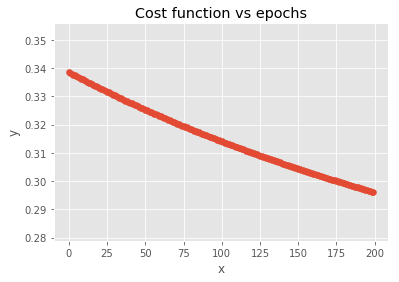

In [13]:
plt.scatter([i for i in range(len(cost_hist))], cost_hist)
plt.title("Cost function vs epochs")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
# Predictions
h_theta_x = sigmoid(np.dot(x, theta_trained))
print(h_theta_x)

[[ 0.5       ]
 [ 0.79857753]
 [ 0.81146724]
 [ 0.94464278]]


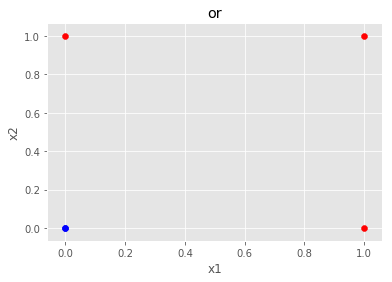

In [15]:
plt.scatter(x[1:,0], x[1:,1], c = "r")
plt.scatter(x[0,:], x[0,:], c = "b")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("or")
plt.show()